#  SyriaTel Customer Churn Rate

# Business Problem

- Recently SyrialTel found revenue decreased and tried to find more details from customer data
- Need to build a model to predict customers who are most likely to cease the service with SyriaTel
- How to foster customer loyalty in order to build stable revenue?

# Obtaining the data

## Import the libraries

In [103]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_score

#resample the data
from imblearn.over_sampling import SMOTE,SMOTENC


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,precision_score, recall_score,accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

## Import the data

In [105]:
df = pd.read_csv('data.csv')

In [106]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [107]:
#Check the data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [108]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [109]:
#Check if any null values in the dataset
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [110]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Text(0.5, 0, 'Customers Churn')

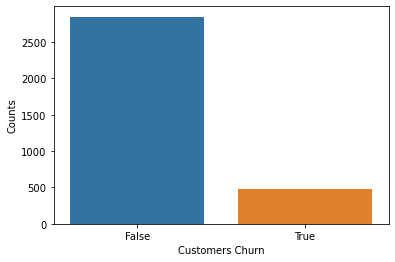

In [111]:
bar_churn = df['churn'].value_counts()
ax = sns.barplot(x = bar_churn.index, y = bar_churn.values)
ax.set_ylabel('Counts')
ax.set_xlabel('Customers Churn')


## Checking for Multicollinearity

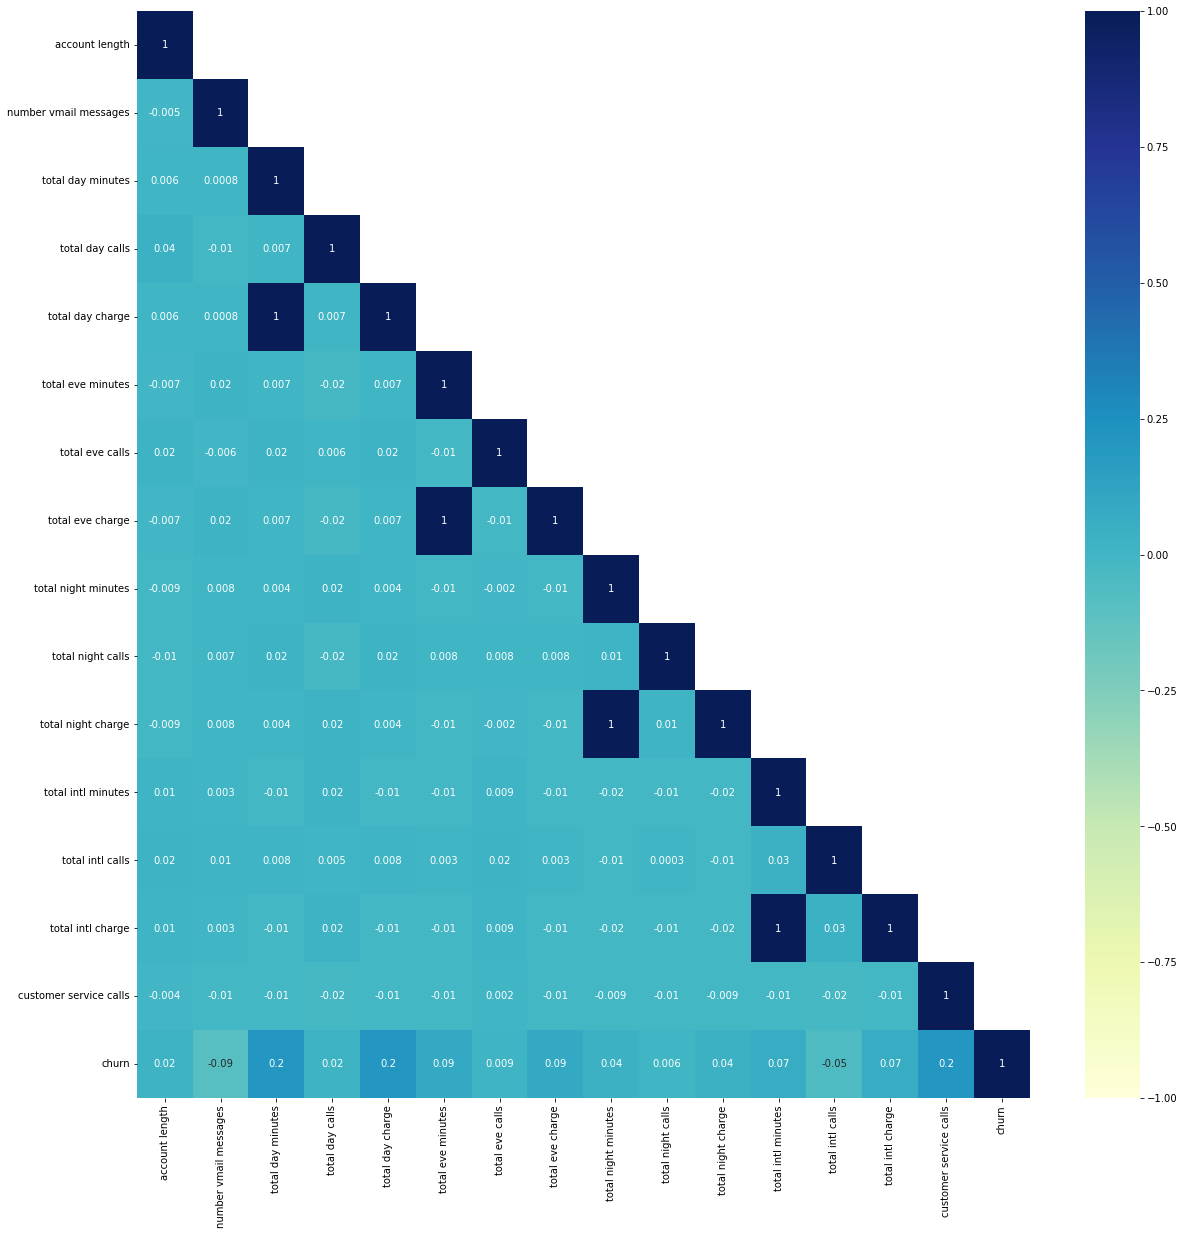

In [112]:
'''showed the lower triangular heatmap
https://datavizpyr.com/how-to-make-lower-triangular-heatmap-with-python/
'''
corr = df.drop(columns = ['area code','phone number','state']).corr()
corr_tri = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data = corr_tri, center = 0, cmap = "YlGnBu", annot = True, fmt='.1g',vmin=-1);

Convert columns "churn","internaltion plan" and "voice mail plan"  with Yes or No to binary 

In [113]:
# Convert columns with yes or no to binary
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])


## Define X and y

In this project, we focused on services and price SyriaTel provided nationally. So we don't take area, or phone number into consideration.

In [114]:
X = df.drop(['area code','phone number','state','churn'],axis=1)
y = df['churn']

In [115]:
X.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


## Train Test Split

Split the data into train and test set by test size 25%

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 123)

## Standardize the data

Standardize the data since the features in the data set have different ranges.

In [117]:
#Instantiate StandardScaler
scaler = StandardScaler()

#Transform X_train to scaled data set and fit the model with scaled X train data
scaled_X_train = scaler.fit_transform(X_train)

#Transform X_test to scaled data set
scaled_X_test= scaler.transform(X_test)

#Convert scaled data into a DataFrame
scaled_X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

## Baseline Model ( Using Logistic Regression Model)

test:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       723
           1       0.53      0.23      0.33       111

    accuracy                           0.87       834
   macro avg       0.71      0.60      0.63       834
weighted avg       0.84      0.87      0.85       834

train:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2127
           1       0.57      0.21      0.30       372

    accuracy                           0.86      2499
   macro avg       0.72      0.59      0.61      2499
weighted avg       0.83      0.86      0.83      2499

Test Recall_score 0.23423423423423423
Test accuracy score 0.8705035971223022


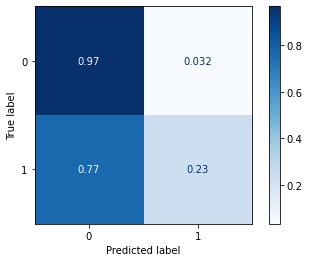

In [118]:
lr= LogisticRegression(random_state = 123)
lr.fit(scaled_X_train,y_train)

y_train_pred = lr.predict(scaled_X_train)
y_test_pred = lr.predict(scaled_X_test)

#plot_confusion_matrix(lr,scaled_X_test,y_test,show_absolute=True,show_normed=True,colorbar=True)

plot_confusion_matrix(lr,scaled_X_test,y_test,
                                normalize='true',
                                cmap='Blues')


rs = recall_score(y_train,y_train_pred)
print(f"test:\n{classification_report(y_test,y_test_pred)}")
print(f"train:\n{classification_report(y_train,y_train_pred)}")

#print Test recall score
rs = recall_score(y_test,y_test_pred)
print(f"Test Recall_score {rs}")

# Print the accuracy on test set

print(f"Test accuracy score {lr.score(scaled_X_test,y_test)}")

From above we can see the imbalance class, so we use SMOTE to sythesize data for minority class.

In [119]:
# Create instance of smote
smote = SMOTENC(categorical_features=[1,2],random_state=123)

# Create resampled version of the train dataset
resampled_X_train, resampled_y_train = smote.fit_resample(scaled_X_train, y_train)

Create a function to print scores and confusion matrix for the models

In [120]:
def eval_model(model,X_train,y_train,X_test,y_test):
    
    #fit the model
    model.fit(X_train,y_train)
    
    #predict the target variable
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #plot the confusion matrix with test set
    plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='Blues')
    
    #print recall score and classification report for train set and test set
    rs_train = recall_score(y_train,y_train_pred)
    rs_test = recall_score(y_test, y_test_pred)
    print(f"test:\n{classification_report(y_test,y_test_pred)}")
    print(f"train:\n{classification_report(y_train,y_train_pred)}")
    print(f"Train Recall_score {rs_train}")
    print(f"Test Recall_score {rs_test}")

    # Print the accuracy of a model
    acc_score = model.score(X_test,y_test)
    acc_score_train = model.score(X_train,y_train)
    print(f"Train accuracy score {acc_score_train}")
    print(f"Test accuracy score {acc_score}")

## Logistics Regression Model with resampled data

In [121]:
logre= LogisticRegression(random_state = 123)

test:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       723
           1       0.33      0.79      0.46       111

    accuracy                           0.76       834
   macro avg       0.64      0.77      0.65       834
weighted avg       0.88      0.76      0.79       834

train:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2127
           1       0.74      0.76      0.75      2127

    accuracy                           0.75      4254
   macro avg       0.75      0.75      0.75      4254
weighted avg       0.75      0.75      0.75      4254

Train Recall_score 0.7588152327221439
Test Recall_score 0.7927927927927928
Train accuracy score 0.7458862247296661
Test accuracy score 0.7565947242206235


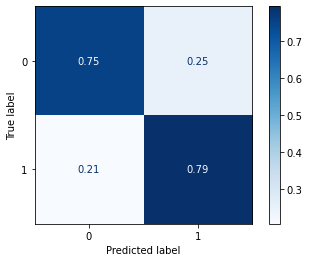

In [122]:
eval_model(logre,resampled_X_train,resampled_y_train,scaled_X_test,y_test)

## K Nearest Neighbors Model

In [123]:
# Instantiate a KNeighborsClassifier()
knn= KNeighborsClassifier()

test:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       723
           1       0.80      0.36      0.50       111

    accuracy                           0.90       834
   macro avg       0.85      0.67      0.72       834
weighted avg       0.89      0.90      0.89       834

train:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2127
           1       0.94      0.49      0.65       372

    accuracy                           0.92      2499
   macro avg       0.93      0.74      0.80      2499
weighted avg       0.92      0.92      0.91      2499

Train Recall_score 0.4946236559139785
Test Recall_score 0.36036036036036034
Train accuracy score 0.9203681472589036
Test accuracy score 0.9028776978417267


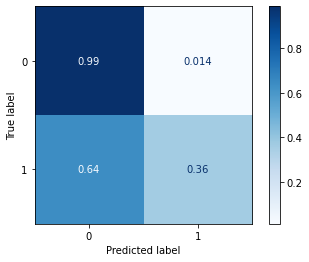

In [124]:
eval_model(knn,scaled_X_train,y_train,scaled_X_test,y_test)

## KNN with resampled data

In [125]:
# Instantiate a KNeighborsClassifier()
knn_re= KNeighborsClassifier()

test:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       723
           1       0.37      0.71      0.49       111

    accuracy                           0.80       834
   macro avg       0.66      0.76      0.68       834
weighted avg       0.87      0.80      0.82       834

train:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2127
           1       0.89      0.99      0.93      2127

    accuracy                           0.93      4254
   macro avg       0.94      0.93      0.93      4254
weighted avg       0.94      0.93      0.93      4254

Train Recall_score 0.9877762106252939
Test Recall_score 0.7117117117117117
Train accuracy score 0.9304184297132111
Test accuracy score 0.8009592326139089


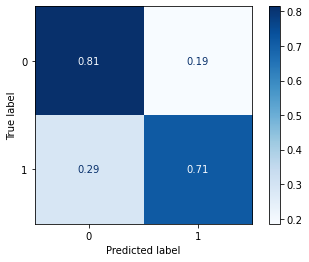

In [126]:
eval_model(knn_re,resampled_X_train,resampled_y_train,scaled_X_test,y_test)

## Decision Tree Model

In [172]:
# Instantiate a DecisionTreeClassifier()
dt= DecisionTreeClassifier(max_depth=3,random_state=123)

test:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       723
           1       0.72      0.43      0.54       111

    accuracy                           0.90       834
   macro avg       0.82      0.70      0.74       834
weighted avg       0.89      0.90      0.89       834

train:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2127
           1       0.83      0.49      0.62       372

    accuracy                           0.91      2499
   macro avg       0.87      0.74      0.78      2499
weighted avg       0.90      0.91      0.90      2499

Train Recall_score 0.489247311827957
Test Recall_score 0.43243243243243246
Train accuracy score 0.9091636654661864
Test accuracy score 0.9016786570743405


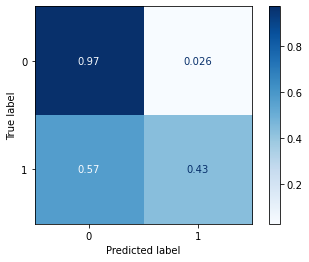

In [173]:
eval_model(dt,scaled_X_train,y_train,scaled_X_test,y_test)

## Decision Tree with resampled data

In [175]:
# Instantiate a DecisionTreeClassifier()
dt_re= DecisionTreeClassifier(max_depth=3,random_state=123)

test:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       723
           1       0.57      0.78      0.66       111

    accuracy                           0.89       834
   macro avg       0.77      0.85      0.80       834
weighted avg       0.91      0.89      0.90       834

train:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      2127
           1       0.88      0.74      0.80      2127

    accuracy                           0.82      4254
   macro avg       0.82      0.82      0.81      4254
weighted avg       0.82      0.82      0.81      4254

Train Recall_score 0.7353079454630935
Test Recall_score 0.7837837837837838
Train accuracy score 0.8159379407616361
Test accuracy score 0.8920863309352518


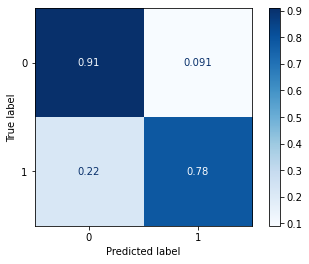

In [176]:
eval_model(dt_re,resampled_X_train,resampled_y_train,scaled_X_test,y_test)

## Random Forest Model

In [131]:
rf = RandomForestClassifier(random_state =123)

test:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       723
           1       0.85      0.77      0.81       111

    accuracy                           0.95       834
   macro avg       0.91      0.87      0.89       834
weighted avg       0.95      0.95      0.95       834

train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00       372

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499

Train Recall_score 0.9973118279569892
Test Recall_score 0.7657657657657657
Train accuracy score 0.9995998399359743
Test accuracy score 0.9508393285371702


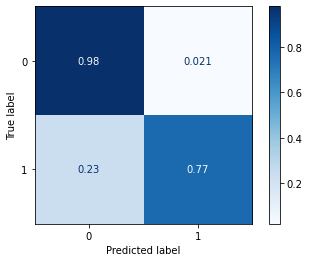

In [132]:
eval_model(rf,scaled_X_train,y_train,scaled_X_test,y_test)

## Random Forest Model with resampled data

In [133]:
rf_re = RandomForestClassifier(random_state =123)

test:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       723
           1       0.80      0.81      0.80       111

    accuracy                           0.95       834
   macro avg       0.88      0.89      0.89       834
weighted avg       0.95      0.95      0.95       834

train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      2127

    accuracy                           1.00      4254
   macro avg       1.00      1.00      1.00      4254
weighted avg       1.00      1.00      1.00      4254

Train Recall_score 1.0
Test Recall_score 0.8108108108108109
Train accuracy score 1.0
Test accuracy score 0.947242206235012


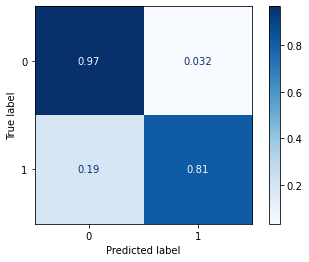

In [134]:
eval_model(rf_re,resampled_X_train,resampled_y_train,scaled_X_test,y_test)

## XG Boost Model

In [135]:
xg = XGBClassifier(random_state =123)

[22:27:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       723
           1       0.92      0.82      0.87       111

    accuracy                           0.97       834
   macro avg       0.95      0.90      0.92       834
weighted avg       0.97      0.97      0.97       834

train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00       372

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499

Train Recall_score 1.0
Test Recall_score 0.8198198198198198
Train accuracy score 

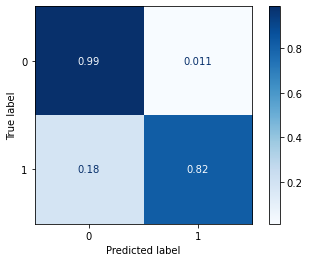

In [136]:
eval_model(xg,scaled_X_train,y_train,scaled_X_test,y_test)

## XGBoost Model with resampled data

In [137]:
xg_re = XGBClassifier(random_state =123)

[22:27:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       723
           1       0.86      0.80      0.83       111

    accuracy                           0.96       834
   macro avg       0.92      0.89      0.90       834
weighted avg       0.96      0.96      0.96       834

train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      2127

    accuracy                           1.00      4254
   macro avg       1.00      1.00      1.00      4254
weighted avg       1.00      1.00      1.00      4254

Train Recall_score 1.0
Test Recall_score 0.8018018018018018
Train accuracy score 

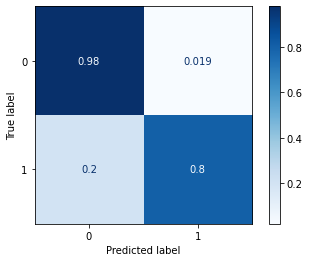

In [138]:
eval_model(xg_re,resampled_X_train,resampled_y_train,scaled_X_test,y_test)

After reviewing all the models, there are three models with higher recall score and accuracy score.
- XGBoost model with recall score 0.82 and accuracy score 0.97
- XGBoost model fit resampled data with recall score 0.82 and accuracy score 0.95
- Random Forest fit resampled data with recall score 0.86 and accuracy score 0.96

I will use GridSearch to tune above models and find the model with the best performance.

## Tuning XGBoost

In [158]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [1,2,5,10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [159]:
grid_clf = GridSearchCV(xg,param_grid,cv=3,scoring='recall',n_jobs=1)
grid_clf.fit(scaled_X_train,y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(scaled_X_train)
test_preds = grid_clf.predict(scaled_X_test)
training_accuracy = accuracy_score(y_train,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[23:31:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[23:31:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[23:32:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [160]:
xg_grid=XGBClassifier(learning_rate=0.2,max_depth=10,min_child_weight=1,n_estimators=100,subsample=0.7)

[23:33:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       723
           1       0.91      0.77      0.84       111

    accuracy                           0.96       834
   macro avg       0.94      0.88      0.91       834
weighted avg       0.96      0.96      0.96       834

train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00       372

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499

Train Recall_score 1.0
Test Recall_score 0.7747747747747747
Train accuracy score 

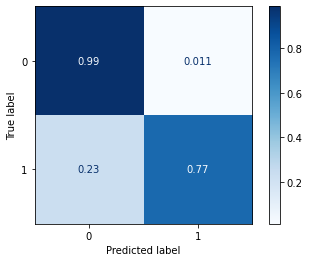

In [161]:
eval_model(xg_grid,scaled_X_train,y_train,scaled_X_test,y_test)

## Tuning XGBoost with resampled data

In [162]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [1,2,5,10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [163]:
grid_clf = GridSearchCV(xg,param_grid,cv=3,scoring='recall',n_jobs=1)
grid_clf.fit(resampled_X_train,resampled_y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(resampled_X_train)
test_preds = grid_clf.predict(scaled_X_test)
training_accuracy = accuracy_score(resampled_y_train,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[23:33:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[23:33:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[23:34:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [164]:
xg_grid_smote=XGBClassifier(learning_rate=0.1,max_depth=10, min_child_weight=1,n_estimators=100, subsample=0.7)

[23:35:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       723
           1       0.85      0.85      0.85       111

    accuracy                           0.96       834
   macro avg       0.91      0.91      0.91       834
weighted avg       0.96      0.96      0.96       834

train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      2127

    accuracy                           1.00      4254
   macro avg       1.00      1.00      1.00      4254
weighted avg       1.00      1.00      1.00      4254

Train Recall_score 0.998119417019276
Test Recall_score 0.8468468468468469
Train a

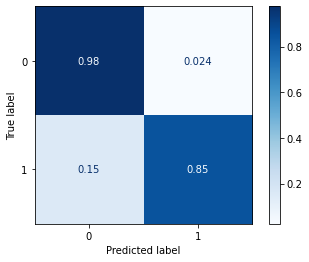

In [165]:
eval_model(xg_grid_smote,resampled_X_train,resampled_y_train,scaled_X_test,y_test)

## Tuning Random Forest Model

In [166]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [1,2,5,10],
    'min_samples_split':[1,5,10,20]
}

In [167]:
grid_rf = GridSearchCV(rf_re,param_grid,cv=3,scoring='recall',n_jobs=1)
grid_rf.fit(resampled_X_train,resampled_y_train)

best_parameters = grid_rf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_rf.predict(resampled_X_train)
test_preds = grid_rf.predict(X_test)
training_accuracy = accuracy_score(resampled_y_train,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
criterion: 'gini'
max_depth: 10
min_samples_split: 5

Training Accuracy: 95.86%
Validation accuracy: 35.49%


In [168]:
rf_grid=RandomForestClassifier(criterion='gini',max_depth=10, min_samples_split=5)

test:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       723
           1       0.76      0.83      0.79       111

    accuracy                           0.94       834
   macro avg       0.87      0.89      0.88       834
weighted avg       0.95      0.94      0.94       834

train:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2127
           1       0.99      0.92      0.96      2127

    accuracy                           0.96      4254
   macro avg       0.96      0.96      0.96      4254
weighted avg       0.96      0.96      0.96      4254

Train Recall_score 0.923366243535496
Test Recall_score 0.8288288288288288
Train accuracy score 0.9567465914433474
Test accuracy score 0.9424460431654677


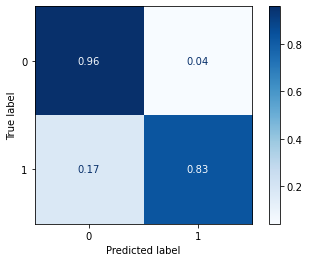

In [150]:
eval_model(rf_grid,resampled_X_train,resampled_y_train,scaled_X_test,y_test)

After running GridSearch for above 3 models, I chose XGBoost model fit resampled data. The model provided recall score 0.84 and the highest accuracy score 0.96 among 3 models.

## Find Feature Importances in XGBoost Model

Calculating feature importances and plot the feature by sorted values

<AxesSubplot:xlabel='importance', ylabel='index'>

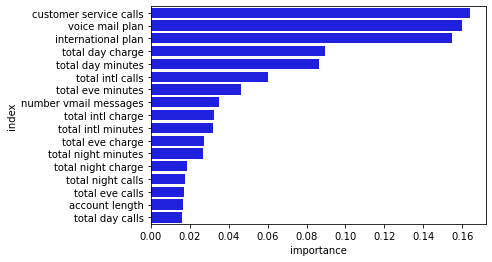

In [169]:
# Calculate feature importances
feature_importances = xg_grid_smote.feature_importances_

# Create a list of features: done
feature_list = list(resampled_X_train.columns)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)


result = relative_importances.reset_index().sort_values('importance',ascending=False)

#plot feature importances with sorted values
sns.barplot(x='importance', y="index", data=result, color='blue')

From the feature importance plot, we found 4 highest weight in the dataset
- customer service calls
- total day minutes
- voicemail plan
- international plan

# Conclusions

- Use the final model to predict the customer churn rate, 84% customer churn will be predicted, with accuracy 96%
- Conduct customer complaint analysis
- Improve the voicemail plan and international plan services
- Review rates, minutes and charges for all plan

# Furthermore

- Provide surveys after customer service calls to see if customers problems got solved
- Send emails or use website to customers who are likely to discontinue the service